```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture10-NumericalDerivatives.pdf)
```

In [1]:
import numpy as np

# Finite differences

## Basic schemes

The problem of evaluating a derivative at a point $x$ is ubiquitous in physics and engineering.

Although the definition of the derivative is simple, it is not always easy to evaluate it numerically.
For instance this is the case when:
- $f(x)$ is a tabulated function known only at discrete points $x_i$
- $f(x)$ is a function that is expensive to evaluate
- $f(x)$ is defined implicitly making it challenging to evaluate the derivative efficiently

Finite differences are a simple and effective way to evaluate derivatives numerically.

### Forward difference

```{figure} fd.png
:width: 250px
:align: center
:name: fig-fd
```

The forward difference approximates the limit $h \to 0$ by a finite step $h$:

$$
f'(x) \simeq \frac{f(x+h) - f(x)}{h}~.
$$

The truncation error can be estimated through the Taylor theorem

$$
R_{\rm forw} = -\frac{1}{2}h f''(x) + \mathcal{O}(h^2)
$$

### Backward difference

```{figure} bd.png
:width: 250px
:align: center
:name: fig-bd
```

The backward difference approximates the limit $h \to 0$ by a finite step $h$ in the opposite (negative) direction:

$$
f'(x) \simeq \frac{f(x) - f(x-h)}{h}~.
$$

The truncation error:

$$
R_{\rm back} = \frac{1}{2}h f''(x) + \mathcal{O}(h^2)
$$

### Central difference

Central difference is an average of forward and backward differences and reads:

$$
f'(x) \simeq \frac{f(x+h) - f(x-h)}{2h}~.
$$

Taking the average of forward and backward differences cancels out the $\mathcal{O}(h)$ term in the error estimate, making the central difference more accurate than the forward or backward difference:

$$
R_{\rm cent} = -\frac{1}{6}h^2 f'''(x) + \mathcal{O}(h^3)
$$

### Implementation

In [2]:
def df_forward(f,x,h):
    return (f(x+h) - f(x)) / h

def df_backward(f,x,h):
    return (f(x) - f(x-h)) / h

def df_central(f,x,h):
    return (f(x+h) - f(x-h)) / (2. * h)

## Illustration

Let us consider the function $f(x) = e^x$ and evaluate its derivative at $x=0$ using various methods.

In [3]:
import numpy as np
    
def f(x):
    return np.exp(x)

def df(x):
    return np.exp(x)

def d2f(x):
    return np.exp(x)

def d3f(x):
    return np.exp(x)

def d4f(x):
    return np.exp(x)

def d5f(x):
    return np.exp(x)

**Forward difference**

In [4]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))
x0 = 1.

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []
arr_err_theo_full = []
epsm = 10**-16 # Machine epsilon

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_forward(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(0.5*h*d2f(x0)/df(x0))
    arr_err_theo.append(df_err_theo)
    df_err_theo_full = df_err_theo + 2. * epsm / h
    arr_err_theo_full.append(df_err_theo_full)
    
arr_df_forw = arr_df[:]
arr_err_forw = arr_err[:]
arr_err_theo_forw = arr_err_theo[:]
arr_err_theo_full_forw = arr_err_theo_full[:]

h          f'(0)                Relative error      
1          4.670774270471606    0.7182818284590456  
0.1        2.858841954873883    0.051709180756477874
0.01       2.7319186557871245   0.005016708416805288
0.001      2.7196414225332255   0.0005001667082294914
0.0001     2.718417747082924    5.000166739738369e-05
1e-05      2.7182954199567173   5.000032568337868e-06
1e-06      2.7182831874306146   4.999377015549417e-07
1e-07      2.7182819684057336   5.1483509544443144e-08
1e-08      2.7182818218562943   2.429016271026634e-09
1e-09      2.7182820439008992   7.925662890392757e-08
1e-10      2.7182833761685288   5.693704999536528e-07
1e-11      2.7183144624132183   1.2005360824447243e-05
1e-12      2.7187141427020833   0.00015903952213936482
1e-13      2.717825964282383    0.000167703058560452
1e-14      2.708944180085382    0.0034351288655586204
1e-15      3.108624468950438    0.1435990324493588  
1e-16      0.0                  1.0                 
1e-17      0.0                  

**Backward difference**

In [5]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []
arr_err_theo_full = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_backward(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(0.5*h*d2f(x0)/df(x0))
    arr_err_theo.append(df_err_theo)
    df_err_theo_full = df_err_theo + 2. * epsm / h
    arr_err_theo_full.append(df_err_theo_full)
    
arr_df_back = arr_df[:]
arr_err_back = arr_err[:]
arr_err_theo_back = arr_err_theo[:]
arr_err_theo_full_back = arr_err_theo_full[:]

h          f'(0)                Relative error      
1          1.718281828459045    0.36787944117144233 
0.1        2.5867871730209524   0.048374180359596904
0.01       2.704735610978304    0.004983374916801915
0.001      2.7169231404782224   0.0004998333751114198
0.0001     2.7181459188962975   4.999833399342759e-05
1e-05      2.7182682370785467   4.999989462496166e-06
1e-06      2.718280469160561    5.000579666768477e-07
1e-07      2.7182816886295313   5.144040337599916e-08
1e-08      2.7182818218562943   2.429016271026634e-09
1e-09      2.7182815998116894   8.411466144598084e-08
1e-10      2.7182789352764303   1.0643424035454313e-06
1e-11      2.7182700534922333   4.3317682105436e-06 
1e-12      2.7182700534922333   4.3317682105436e-06 
1e-13      2.717825964282383    0.000167703058560452
1e-14      2.708944180085382    0.0034351288655586204
1e-15      2.6645352591003757   0.019772257900549463
1e-16      0.0                  1.0                 
1e-17      0.0                  1.0 

**Central difference**

In [6]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []
arr_err_theo_full = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_central(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(h**2 * d3f(x0)/df(x0)/6.)
    arr_err_theo.append(df_err_theo)
    df_err_theo_full = df_err_theo + epsm / h
    arr_err_theo_full.append(df_err_theo_full)

arr_df_cent = arr_df[:]
arr_err_cent = arr_err[:]
arr_err_theo_cent = arr_err_theo[:]
arr_err_theo_full_cent = arr_err_theo_full[:]

h          f'(0)                Relative error      
1          3.194528049465325    0.17520119364380154 
0.1        2.7228145639474177   0.001667500198440488
0.01       2.718327133382714    1.6666750001686406e-05
0.001      2.718282281505724    1.6666655903580706e-07
0.0001     2.718281832989611    1.66670197804557e-09
1e-05      2.718281828517632    2.1552920850702018e-11
1e-06      2.718281828295588    6.013256095296185e-11
1e-07      2.7182818285176324   2.155308422199237e-11
1e-08      2.7182818218562943   2.429016271026634e-09
1e-09      2.7182818218562943   2.429016271026634e-09
1e-10      2.7182811557224795   2.474859517958893e-07
1e-11      2.7182922579527258   3.836796306951821e-06
1e-12      2.7184920980971583   7.735387696441061e-05
1e-13      2.717825964282383    0.000167703058560452
1e-14      2.708944180085382    0.0034351288655586204
1e-15      2.8865798640254066   0.06191338727440458 
1e-16      0.0                  1.0                 
1e-17      0.0                  

## Higher-order finite differences

To improve the approximation error one can use several function evaluations, e.g.
$$
f'(x) \simeq \frac{A f(x+2h) + B f(x+h) + C f(x) + D f(x-h) + E f(x-2h)}{h} + \mathcal{O}(h^4)
$$

<!-- Determine $A,B,C,D,E$ from from Taylor expansion of $f(x)$: -->
One can determine the coefficients $A,B,C,D,E$ by matching the Taylor expansion of $f(x)$ to the above expression, giving
$$
f'(x) \simeq \frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h} + \frac{h^4}{30} f^{(5)} (x)
$$

In [7]:
def df_central2(f,x,h):
    return (-f(x+2.*h) + 8. * f(x+h) - 8. * f(x-h) + f(x - 2.*h)) / (12. * h)

**5-point central difference O(h^4)**

In [8]:
print("{:<10} {:<20} {:<20}".format('h',"f'(0)","Relative error"))

arr_h = []
arr_df = []
arr_err = []
arr_err_theo = []
arr_err_theo_full = []

for i in range(0,-20,-1):
    h = 10**i
    df_val = df_central2(f, x0,h)
    df_err = abs((df_val - df(x0)) / df(x0))
    print("{:<10} {:<20} {:<20}".format(h,df_val,df_err))
    arr_h.append(h)
    arr_df.append(df_val)
    arr_err.append(df_err)
    df_err_theo = abs(h**4 * d5f(x0)/df(x0)/30.)
    arr_err_theo.append(df_err_theo)
    df_err_theo_full = df_err_theo + 3. * epsm / (2. * h)
    arr_err_theo_full.append(df_err_theo_full)
    
arr_df_cent2 = arr_df[:]
arr_err_cent2 = arr_err[:]
arr_err_theo_cent2 = arr_err_theo[:]
arr_err_theo_full_cent2 = arr_err_theo_full[:]

h          f'(0)                Relative error      
1          2.6162326091190815   0.03754180978276775 
0.1        2.718272756726489    3.3373039032555605e-06
0.01       2.7182818275529415   3.3333689946350053e-10
0.001      2.7182818284586054   1.6173757744640934e-13
0.0001     2.7182818284602708   4.5090476136574727e-13
1e-05      2.7182818284769237   6.577164778196963e-12
1e-06      2.718281828295588    6.013256095296185e-11
1e-07      2.7182818296278555   4.299813100967634e-10
1e-08      2.7182818070533203   7.874726058271109e-09
1e-09      2.718281747841426    2.9657564717135134e-08
1e-10      2.7182804155737963   5.197714357668605e-07
1e-11      2.7182885572093105   2.4753688874237083e-06
1e-12      2.7187141427020833   0.00015903952213936482
1e-13      2.718196038623925    3.156031660224946e-05
1e-14      2.7200464103316335   0.0006491533931890901
1e-15      2.849572429871235    0.04829911307857894 
1e-16      0.0                  1.0                 
1e-17      3.700743415417

## Balancing truncation and round-off errors

Let us analyze how the error of finite difference approximation depends on the step size $h$ for the various methods.

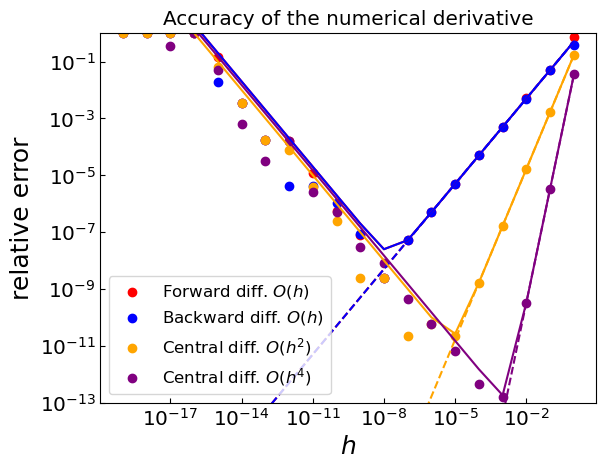

In [9]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.title("Accuracy of the numerical derivative")
plt.xlabel("${h}$", fontsize=18)
plt.ylabel("relative error", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-13,1.)
plt.scatter(arr_h, arr_err_forw, color="red",label="Forward diff. ${O(h)}$")
plt.plot(arr_h, arr_err_theo_forw, color="red",linestyle="--")
plt.plot(arr_h, arr_err_theo_full_forw, color="red")
plt.scatter(arr_h, arr_err_back, color="blue",label="Backward diff. ${O(h)}$")
plt.plot(arr_h, arr_err_theo_back, color="blue",linestyle="--")
plt.plot(arr_h, arr_err_theo_full_back, color="blue")
plt.scatter(arr_h, arr_err_cent, color="orange",label="Central diff. ${O(h^2)}$")
plt.plot(arr_h, arr_err_theo_cent, color="orange",linestyle="--")
plt.plot(arr_h, arr_err_theo_full_cent, color="orange")
plt.scatter(arr_h, arr_err_cent2, color="purple",label="Central diff. ${O(h^4)}$")
plt.plot(arr_h, arr_err_theo_cent2, color="purple",linestyle="--")
plt.plot(arr_h, arr_err_theo_full_cent2, color="purple")

plt.legend()
plt.show()

One can see that the error of finite difference approximation exhibits a non-monotonic behavior as a function of the step size $h$.
While the increase of the error at large $h$ is clearly due to the truncation error, the decrease at small $h$ is less trivial.

The reason for this behavior is that the round-off error (machine precision) becomes significant at small $h$, namely it is impossible to accurately distinguish between $f(x+h)$ and $f(x)$ (or between $x+h$ and $x$) when $h$ becomes too small.
This leads to somewhat counterintuitive behavior that the relative error of the finite difference approximation becomes larger as $h$ decreases.

To summarize, there are two sources of errors in the finite difference approximation:
1. **Truncation Error**: Arises from the approximation in the Taylor series expansion
2. **Round-off Error**: Arises from finite precision arithmetic in computers


Due to this balance between the truncation and round-off errors, there is usually an optimal step size $h$ that depends on the function $f(x)$ and the machine precision. 
For instance, for central difference method, the expression for the error is

$$\rm{error}\left(df/dx\right) = \varepsilon_m \frac{|f(x)|}{h} + \frac{|f^{'''} (x)|}{6}h^2$$

By minimizing this expression with respect to $h$, one can find the optimal step size $h$ that minimizes the error:

$$h \approx \sqrt[3]{6\varepsilon_m \frac{|f(x)|}{|f^{'''} (x)|}} \sim \sqrt[3]{\varepsilon_m \frac{|f(x)|}{|f^{'''} (x)|}}$$

For a numerical differentiation scheme with truncation error of order $O(h^p)$, the optimal step size follows the general formula:

$$h \approx \sqrt[p+1]{\varepsilon_m \frac{|f(x)|}{|f^{(p+1)}(x)|}}$$

## High-order derivatives

Finite difference schemes for high-order derivatives are based on the same idea as for the first derivative.
One can derive the schemes by applying the basic schemes to the derivatives.

### Central difference for the 2nd derivative

Central difference for the 2nd derivative reads:
$$
f''(x) \simeq \frac{f'(x+h/2) - f'(x-h/2)}{h}
$$

Applying the central difference again to $f'(x+h/2)$ and $f'(x-h/2)$, one obtains the central difference for the 2nd derivative:
$$
f''(x) \simeq \frac{f(x+h) - 2f(x) - f(x-h)}{h^2}
$$

The truncation error reads:
$$
R_{f''_{\rm cent}(x)} = -\frac{1}{12} h^2 f^{(4)}(x)
$$

In [10]:
def d2f_central(f,x,h):
    return (f(x+h) - 2*f(x) + f(x-h)) / (h**2)


### Illustration

In [11]:
print("{:<10} {:<20} {:<20}".format('h',"f''(0)","Relative error"))

arr_h = []
arr_d2f = []
arr_err = []
arr_err_theo = []
arr_err_theo_full = []

for i in range(0,-20,-1):
    h = 10**i
    d2f_val = d2f_central(f, x0,h)
    d2f_err = abs((d2f_val - d2f(x0)) / d2f(x0))
    print("{:<10} {:<20} {:<20}".format(h,d2f_val,d2f_err))
    arr_h.append(h)
    arr_d2f.append(d2f_val)
    arr_err.append(d2f_err)
    df_err_theo = abs(h**2 * d4f(x0)/d2f(x0)/12.)
    arr_err_theo.append(df_err_theo)
    df_err_theo_full = df_err_theo + 4. * epsm / h**2
    arr_err_theo_full.append(df_err_theo_full)

arr_d2f_cent = arr_d2f[:]
arr_err_d2f_cent = arr_err[:]
arr_err_d2f_theo_cent = arr_err_theo[:]
arr_err_d2f_theo_full_cent = arr_err_theo_full[:]

h          f''(0)               Relative error      
1          2.9524924420125602   0.08616126963048779 
0.1        2.720547818529306    0.0008336111607475982
0.01       2.718304480882061    8.333360720313657e-06
0.001      2.7182820550031295   8.334091116267528e-08
0.0001     2.7182818662652153   1.3908112763964208e-08
1e-05      2.718287817060627    2.2030834032893657e-06
1e-06      2.7182700534922333   4.3317682105436e-06 
1e-07      2.797762022055395    0.029239129204423227
1e-08      0.0                  1.0                 
1e-09      444.08920985006256   162.3712903499084   
1e-10      44408.920985006254   16336.129034990841  
1e-11      4440892.098500626    1633711.903499084   
1e-12      444089209.85006267   163371289.34990844  
1e-13      0.0                  1.0                 
1e-14      0.0                  1.0                 
1e-15      444089209850062.56   163371290349907.4   
1e-16      0.0                  1.0                 
1e-17      0.0                  1.0    

### Truncation vs round-off errors

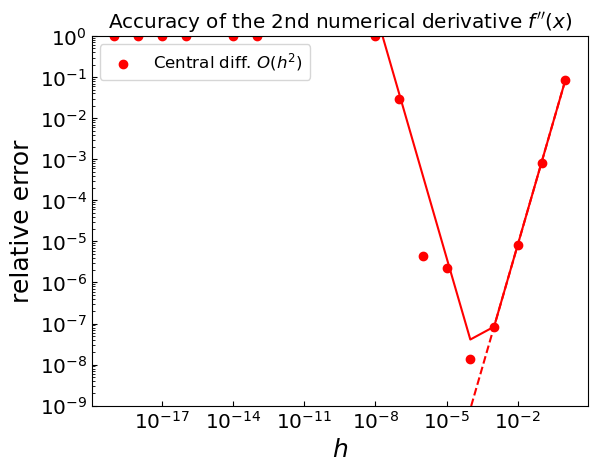

In [12]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.title("Accuracy of the 2nd numerical derivative ${f''(x)}$")
plt.xlabel("${h}$", fontsize=18)
plt.ylabel("relative error", fontsize=18)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-9,1.)
plt.scatter(arr_h, arr_err_d2f_cent, color="red",label="Central diff. ${O(h^2)}$")
plt.plot(arr_h, arr_err_d2f_theo_cent, color="red",linestyle="--")
plt.plot(arr_h, arr_err_d2f_theo_full_cent, color="red")

plt.legend()
plt.show()

## Partial derivatives

For a function of multiple variables $f(x, y, z, ...)$, partial derivatives measure the rate of change with respect to one variable while holding all others constant.

### First-Order Partial Derivatives

For a function $f(x,y)$ of two variables, the first-order partial derivatives can be approximated using central differences:

$$\frac{\partial f}{\partial x} \approx \frac{f(x + h/2, y) - f(x - h/2, y)}{h}$$

$$\frac{\partial f}{\partial y} \approx \frac{f(x, y + h/2) - f(x, y - h/2)}{h}$$

These approximations have truncation error of order $O(h^2)$.


**Step size selection**: Note that the optimal step size may differ for each variable

### Higher-Order Partial Derivatives

#### Second-Order Partial Derivatives

For the second derivative with respect to the same variable:

$$\frac{\partial^2 f}{\partial x^2} \approx \frac{f(x + h, y) - 2f(x, y) + f(x - h, y)}{h^2}$$

$$\frac{\partial^2 f}{\partial y^2} \approx \frac{f(x, y + h) - 2f(x, y) + f(x, y - h)}{h^2}$$

#### Mixed Partial Derivatives

For mixed partial derivatives, we apply the central difference formula sequentially:

$$\frac{\partial^2 f}{\partial x \partial y} \approx \frac{f(x+h/2, y+h/2) - f(x-h/2, y+h/2) - f(x+h/2, y-h/2) + f(x-h/2, y-h/2)}{h^2}$$

This can be understood as first taking the partial derivative with respect to $x$, and then with respect to $y$.
